# EDA

## Описание проекта
**Проект:** Анализ оттока клиентов телекоммуникационной компании

**Цель:** Выявить ключевые факторы, влияющие на отток клиентов, и построить модель для прогнозирования ухода клиентов.

**Бизнес-контекст:**
- Телекоммуникационная компания сталкивается с проблемой оттока клиентов (Churn)
- Привлечение нового клиента стоит в 5-7 раз дороже, чем удержание существующего
- Своевременное предсказание ухода клиента позволяет:
    - Предложить персональные условия удержания
    - Улучшить качество обслуживания проблемных сегментов

**Основные задачи**
1. Провести разведочный анализ данных (EDA)
2. Выявить ключевые факторы, влияющие на отток
3. Построить модель машинного обучения для прогнозирования оттока
4. Разработать рекомендации для отдела маркетинга и клиентского обслуживания

## Data loading/Загрузка данных

In [301]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.random.seed(42)

In [303]:
DATA_PATH = "../data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [304]:
if os.path.exists(DATA_PATH):
    data = pd.read_csv(DATA_PATH)
    print(f"Данные загружены: {data.shape[0]} строк, {data.shape[1]} столбцов")
else:
    raise FileNotFoundError(f"Файл {DATA_PATH} не найден!")

Данные загружены: 7043 строк, 21 столбцов


**Источник данных:** [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

**Размер датасета:** 7043 клиента x 21 признак

### Структура данных:

#### 1. Демографическая информация:
- `customerID` - уникальный идентификатор клиента
- `gender` - пол клиента
- `SeniorCitizen` - является ли клиент пенсионером (0/1)
- `Partner` - наличие партнера (супруга)
- `Dependents` - наличие иждивенцев

#### 2. Информация об услугах:
- `PhoneService` - наличие телефонной услуги
- `MultipleLines` - несколько телефонных линий
- `InternetService` - тип интернет-услуги
- `OnlineSecurity` - онлайн-безопасность
- `OnlineBackup` - онлайн-резервное копирование
- `DeviceProtection` - защита устройства
- `TechSupport` - техническая поддержка
- `StreamingTV` - потоковое телевидение
- `StreamingMovies` - потоковые фильмы

#### 3. Информация об учетной записи:
- `tenure` - срок пребывания клиента (месяцы)
- `Contract` - тип контракта
- `PaperlessBilling` - безбумажный биллинг
- `PaymentMethod` - способ оплаты
- `MonthlyCharges` - ежемесячные расходы
- `TotalCharges` - общие расходы

#### 4. Целевая переменная:
- `Churn` - отток клиента (Yes/No)


## Data overview/Оосмотр данный

In [305]:
# Посмотрим на данные
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [306]:
# Посмотрим пропущенные значения
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [307]:
data.isna().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

В данных нет пропусков
TotalCharges выглядит подозрительно, строковый тип вместо численного.

Необходимо проверить на наличие некорректных данных, исправить и привести к численному типу

In [317]:
data.duplicated().sum()
# дубликатов нет

np.int64(0)

In [308]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [309]:
data.describe(include="str")


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## 2. Target analysis/Проверка качества данных

In [310]:
# Вычислим процент оттока клиентов
print(f"Процент оттока клиентов составляет: {data["Churn"].value_counts()["Yes"] / data["Churn"].count() * 100:.2f}%")

Процент оттока клиентов составляет: 26.54%


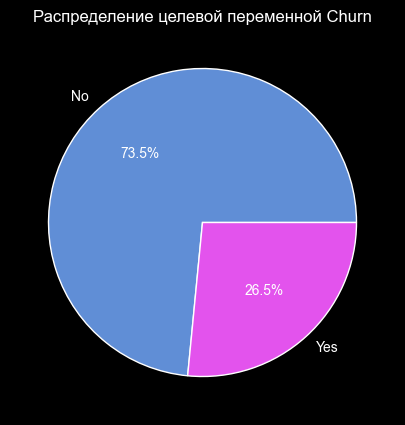

In [318]:
plt.figure(figsize = (8,5))
plt.pie(data["Churn"].value_counts(), labels=["No", "Yes"], autopct="%1.1f%%", colors=["#608ed6", '#e353ed'])
plt.title("Распределение целевой переменной Churn")
plt.show()

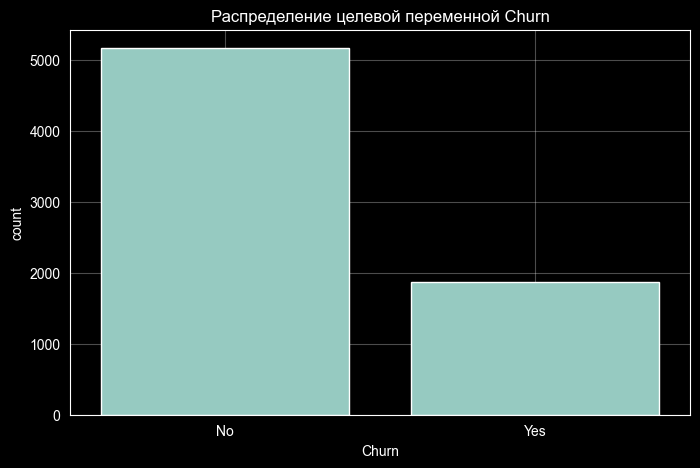

In [323]:
plt.figure(figsize = (8,5))
sns.countplot(x=data["Churn"])
plt.title("Распределение целевой переменной Churn")
plt.grid(True, alpha=0.3)

Видим умеренный дисбаланс (26.58%), поэтому не сможем использовать accuracy.
Метрики, которые мы можем использовать:
* F1 - баланс precision/recall
* ROC_AUC - площадь под ROC кривой
* recall - сколько ушедших нашли (важно для бизнеса!)
* precision - среди предсказанных ушедших сколько реально уйдут

Каждый 3 клиент уходит
Recall важнее precision, т.к лучше предупредить уход

Ответим на вопросы:
- Какие 3 признака сильнее всего коррелируют с оттоком?
- Как зависит отток от типа контракта?
- Есть ли разница в оттоке между новыми (tenure < 12) и лояльными клиентами (tenure > 24)?
- Какие информацию можно извлечь из MonthlyCharges и TotalCharges?